# PG-Culturomics-fast
Trying to make it faster

In [95]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
meta = pd.read_csv("../metadata/metadata.csv")
meta["year"] = (meta.authoryearofbirth.astype(float)+meta.authoryearofdeath.astype(float))/2
meta = meta.loc[~meta.isnull()["year"]]
meta = meta.set_index("id")
meta = meta.loc[meta.language=="['en']"]

In [97]:
meta["year"] = meta.year.astype(int)

In [98]:
meta.shape

(30786, 9)

In [99]:
A=!ls ../data/counts/
counted = [x.split("_")[0] for x in A]
mybooks = np.intersect1d(meta.index,counted)

In [100]:
len(mybooks)

6492

In [87]:
%%time
Bdata = {}
for PGnum in mybooks:
    b = pd.read_table("../data/counts/%s_counts.txt"%PGnum,names=["word","counts"])
    L = b.counts.sum()
    yy = 5*int((meta.loc[PGnum].year+2.5)/5)
    if yy not in Bdata.keys():
        Bdata[yy] = []
    for i in b.index:
        Bdata[yy].append([
            b.loc[i,"word"],
            b.loc[i,"counts"]/L,
        ])

CPU times: user 8min 7s, sys: 2.3 s, total: 8min 10s
Wall time: 8min 9s


In [90]:
data = {year:pd.DataFrame(data= df,columns=["word","freq"]).groupby("word").mean() for year,df in Bdata.iteritems()}

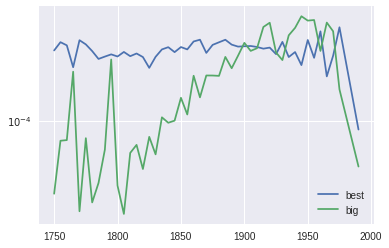

In [94]:
wordlist = ["best","big"]
for word in wordlist:

    a = np.array([
        [year,(lambda x:df.loc[x,"freq"] if x in df.index else np.nan)(word)] for year,df in data.iteritems() if year>=1750
    
    ]).T
    a = a.T[a[0].argsort()].T

    plt.plot(*a,label=word)
plt.yscale("log")
plt.legend()
